In [109]:
# 문제)
# - iris 데이터를 로딩 load_iris
# - 데이터를 분활 (train, test)
# - 사전에 모델학습이 이루어 줘야함(RF)
# - 변수중요도부터 SelectFromModel 함수를 사용해서 변수 선택 (threshold=0.15) 이상만 선색
# - RandomForest 이용해서 분류한 다음 분류 정확도로 평가하시오
# - 변수중요도를 시각화
# 파일로 저장하고 로딩한 다음에 테스트 데이터에 대하여 평가해보시오

In [110]:
# - iris 데이터를 로딩 load_iris
from sklearn import datasets, linear_model
iris=datasets.load_iris()
#X,y=datasets.load_iris(return_X_y=True)
X,y=iris.data,iris.target

In [117]:
# 파일로 저장하고 로딩한 다음에 테스트 데이터에 대하여 평가해보시오
import pickle
from sklearn import svm
clf=svm.SVC()
clf.fit(X,y)
file=open('important','wb')
pickle.dump(clf,file)
file.close()



In [118]:
file=open('important','rb')
data=pickle.load(file)

array([0])

In [111]:
# data=linear_model.LinearRegression()
# data.fit(X_train,y_train)
# y_pred=data.predict(X_test)
from sklearn.feature_selection import SelectFromModel

In [112]:
# - 사전에 모델학습이 이루어 줘야함(RF)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)
rf=RandomForestClassifier(n_estimators=400,random_state=42)#,oob_score=True
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=400, random_state=42)

In [113]:
# - 변수중요도부터 SelectFromModel 함수를 사용해서 변수 선택
 #(threshold=0.15) 이상만 선택
#sorted(zip(map(lambda x: round(x,2), rf.feature_importances_),title),reverse=True)
import numpy as np
from sklearn.linear_model import LogisticRegression
selector=SelectFromModel(estimator=LogisticRegression(),threshold=0.15).fit(X, y)

# 선택된 특성의 마스크 가져오기
selected_feature_mask = selector.get_support()

# NumPy 배열 인덱싱을 사용하여 선택된 특성 추출
selected_features = np.array(iris.feature_names)[selected_feature_mask]

feature_importances = selector.estimator_.coef_[0]

# 선택된 특성과 중요도 출력
for feature, importance in zip(selected_features, feature_importances):
    print(f"특성: {feature}, 중요도: {importance:.4f}")

특성: sepal length (cm), 중요도: -0.4189
특성: sepal width (cm), 중요도: 0.9671
특성: petal length (cm), 중요도: -2.5209
특성: petal width (cm), 중요도: -1.0842


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [114]:
# - RandomForest 이용해서 분류한 다음 분류 정확도로 평가하시오
# 모델에 있는 score* , accuracy_score, cross_val_score*
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *
feature_importances=rf.feature_importances_
print("각 기여도 :",rf.feature_importances_,'\n')

accuracy=rf.score(X_test,y_test)
print(accuracy,'\n')

cr_scores=cross_val_score(rf, X_test, y_test ,cv=5)
print(cr_scores,'\n')

accuracy_score(y_test,rf.predict(X_test))


각 기여도 : [0.11310975 0.032742   0.44379445 0.4103538 ] 

1.0 

[1. 1. 1. 1. 1.] 



1.0

In [115]:
for feature,importances in zip (iris.feature_names,feature_importances):
    print(f'특성:{feature}, 중요도 :{importances:.3f}')

특성:sepal length (cm), 중요도 :0.113
특성:sepal width (cm), 중요도 :0.033
특성:petal length (cm), 중요도 :0.444
특성:petal width (cm), 중요도 :0.410


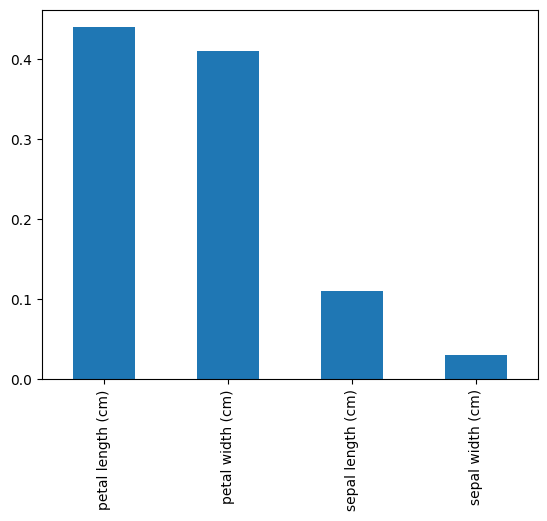

In [116]:
# - 변수중요도를 시각화
import matplotlib.pyplot as plt
import pandas as pd
res=pd.Series(map(lambda x: round(x,2),rf.feature_importances_),index=iris.feature_names)
res=res.sort_values(ascending=False)
res.plot(kind='bar')
plt.show()